In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle
from copy import deepcopy

In [2]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [3]:
dfs = df

In [4]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [5]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [6]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [7]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [8]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [9]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [10]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [11]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [12]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [13]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [14]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [15]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [17]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.0678188569245, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.72272863323, 492.40317589072635, 8226.20896899483, 16305.371451274925, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149963, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768696, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355396, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.

In [18]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-15 00:00:00+00:00    38
2020-11-25 00:00:00+00:00    38
2020-11-16 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-22 00:00:00+00:00    37
2020-11-21 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-23 00:00:00+00:00    36
2020-11-20 00:00:00+00:00    36
2020-11-04 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-14 00:00:00+00:00    35
2020-11-19 00:00:00+00:00    34
2020-11-01 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-11 00:00:00+00:00    34
2020-11-30 00:00:00+00:00    34
2020-11-02 00:00:00+00:00    33
2020-11-08 00:00:00+00:00    33
2020-11-07 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-27 00:00:00+00:00    33
2020-11-12 00:00:00+00:00    32
2020-11-06 00:00:00+00:00    32
2020-11-05 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [19]:
# dfs[dfs["day"].isin({day, day_after})]

In [20]:
day = "2020-11-21 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-30 00:00:00+00:00"
day_before = "2020-11-20 00:00:00+00:00"
# dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[dfs["day"].isin({day, day_after})]
dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]
dfx = dfx[:70]

In [21]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1322349  SIA7198       9V-SFQ     B744   VHHH        PANC   
1322991    SIA25       9V-SMD     A359   EDDF        WSSS   
1323385   SIA285       9V-SMP     A359   WSSS        NZAA   
1323492   SIA288       9V-SMQ     A359   YSSY        YBBN   
1324267  SIA7286       9V-SFI     B744   YSSY        YMML   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [22]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': [],
        'fixed_cost': [],
        'min_cost': [],
        'idle_cost': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity, fixed_cost, min_cost, idle_cost]
Index: []


In [23]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [24]:
airplanes_capacity = []
airplanes_fixedcost = []
airplanes_idlecost = []
airplanes_minutecost = []

for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
                min_cost = 244
                fixed_cost = 946.069
                idle_min_cost = 195
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
                min_cost = 321
                fixed_cost = 851.244
                idle_min_cost = 257
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
                min_cost = 194
                fixed_cost = 969.244
                idle_min_cost = 155
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
                min_cost = 116
                fixed_cost = 732.745
                idle_min_cost = 92
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
                min_cost = 187
                fixed_cost = 1001.250
                idle_min_cost = 150
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
                min_cost = 433
                fixed_cost = 638.418
                idle_min_cost = 347
            airplanes_capacity.append(int(capacity))
            airplanes_fixedcost.append(int(fixed_cost))
            airplanes_idlecost.append(int(idle_min_cost))
            airplanes_minutecost.append(int(min_cost))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [25]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane],
                        'fixed_cost': airplanes_fixedcost[no_airplane],
                        'min_cost': airplanes_minutecost[no_airplane],
                        'idle_cost': airplanes_idlecost[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane],
                                'fixed_cost': airplanes_fixedcost[no_airplane],
                                'min_cost': airplanes_minutecost[no_airplane],
                                'idle_cost': airplanes_idlecost[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane],
                                        'fixed_cost': airplanes_fixedcost[no_airplane],
                                        'min_cost': airplanes_minutecost[no_airplane],
                                        'idle_cost': airplanes_idlecost[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity  fixed_cost  \
0    9V-SMG  A359     LSZH  2020-11-21 13:12:36+00:00     350.0       946.0   
1    9V-SMI  A359     WSSS  2020-11-20 17:54:12+00:00     350.0       946.0   
2    9V-SMT  A359     WSSS  2020-11-22 02:15:05+00:00     350.0       946.0   
3    9V-SMD  A359     NZCH  2020-11-20 22:51:25+00:00     350.0       946.0   
4    9V-SMH  A359     LFPG  2020-11-21 10:03:18+00:00     350.0       946.0   
5    9V-SFN  B744     WSSS  2020-11-21 03:07:03+00:00     416.0       851.0   
6    9V-SMC  A359     WSSS  2020-11-20 02:40:15+00:00     350.0       946.0   
7    9V-SFM  B744     WSSS  2020-11-20 22:21:21+00:00     416.0       851.0   
8    9V-SMS  A359     WSSS  2020-11-21 16:05:15+00:00     350.0       946.0   
9    9V-SFK  B744     WSSS  2020-11-22 06:01:20+00:00     416.0       851.0   
10   9V-SML  A359     WSSS  2020-11-21 01:12:22+00:00     350.0       946.0   
11   9V-SWQ  B77W     WSSS  2020-11-18 17:03:08+00:0

In [26]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [27]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [28]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [29]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946.069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851.244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969.244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732.745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001.250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638.418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    
    return fitness

In [30]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    profit = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        profit = profit + (round((schedule[i][3]-schedule[i][2]).seconds/60)*2.428)*passenger
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946.069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851.244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969.244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732.745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001.250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638.418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
#     fitness_val = (((passenger-0)/(originalFitness[1]-0)*(2*originalFitness[1]))-((cost-0)/(originalFitness[2]-0)*originalFitness[1]))
#     fitness_val = cost-passenger
    fitness_val = profit - cost
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(round(cost))
    fitness.append(plane_count)
    
    return fitness

In [31]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [32]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [33]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [34]:
def rao3(solutions, rand_solution, best_solution, worst_solution):
    start_solution = deepcopy(solutions)
    state = 1
    while (state == 1):
        rao3_done = False
        while (rao3_done == False):
#             print(1)
            solution = deepcopy(start_solution)
            rand_flight = random.randint(0, len(solution)-1) 
            flight_len = round((solution[rand_flight][3]-solution[rand_flight][2]).seconds/60)
            airplanelist = []
            for i in range(len(airplanes)):
                airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
                airplanelist.append(airplane)
            for j in range(rand_flight):
                airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
                airplanelist[solution[j][1]][2] = solution[j][3]

            available_airplanes = []
            for airplane in airplanelist:
                if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                    available_airplanes.append(airplane)
     
            if(len(available_airplanes) >= 3):
                rao3_solution = []
                variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
                for variable in variables:
                    xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                    xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]
                    xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]
                    xworst = airplanes[variable].iloc[worst_solution[rand_flight][1]]

                    if(countFitness(solution)[0] > countFitness(rand_solution)[0]):
                        or1 = xsolution
                        or2 = xrandsolution
                    else:
                        or1 = xrandsolution
                        or2 = xsolution

                    xsolution = xsolution + (random.random()*(xbests- abs(xworst))) + (random.random()*(abs(or1) - abs(or2)))
                    if(variable=="capacity"):
                        xsolution = xsolution*2.428*flight_len
                    else:
                        xsolution = xsolution*flight_len
                    rao3_solution.append(xsolution)
                rao3_solution = np.array(rao3_solution)

                for airplane in available_airplanes:
                    airplane_solution = []
                    for i in range(4):
                        if(i==0):
                            airplane_solution.append(airplane[i+4]*2.428*flight_len)
                        else:
                            airplane_solution.append(airplane[i+4]*flight_len)
                    airplane_solution = np.array(airplane_solution)
                    airplane[-1] = np.linalg.norm(rao3_solution - airplane_solution)    

                new_solution = []
                available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
                airplane1 = solution[rand_flight][1]
                airplane2 = available_airplanes[0][0]
                last_pos1 = -1
                last_pos2 = -1
                for l in range(len(solution)):
                    if(l < rand_flight):
                        new_solution.append(solution[l])
                        if(solution[l][1]==airplane1):
                            last_pos1 = l
                        elif(solution[l][1]==airplane2):
                            last_pos2 = l   
                    else:                                        
                        newflight = solution[l]
                        newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                        if(solution[l][1]==airplane1):
                            newflight[1] = airplane2                        
                            if(last_pos2 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos2 = l        
                        elif(solution[l][1]==airplane2):
                            newflight[1] = airplane1                        
                            if(last_pos1 > -1):
                                if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                    newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                    newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                            last_pos1 = l 
                        new_solution.append(newflight)                    
                        
                rao3_done = True
                if(rao3_done == True):
                    state = 0
                    start_solution = deepcopy(new_solution)
#         state = random.randint(0,1)
        
    return new_solution 

In [35]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1322349  SIA7198       9V-SFQ     B744   VHHH        PANC   
1322991    SIA25       9V-SMD     A359   EDDF        WSSS   
1323385   SIA285       9V-SMP     A359   WSSS        NZAA   
1323492   SIA288       9V-SMQ     A359   YSSY        YBBN   
1324267  SIA7286       9V-SFI     B744   YSSY        YMML   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [36]:
test = createSchedule()

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
print(test)

[[0, 11, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 35, 0.133], [1, 23, Timestamp('2020-11-20 16:38:35+0000', tz='UTC'), Timestamp('2020-11-21 05:59:37+0000', tz='UTC'), 47, 0.133], [2, 42, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 35, 0.133], [3, 15, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 35, 0.133], [4, 26, Timestamp('2020-11-20 18:18:48+0000', tz='UTC'), Timestamp('2020-11-21 04:10:12+0000', tz='UTC'), 49, 0.14], [5, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 02:27:31+0000', tz='UTC'), 71, 0.171], [6, 21, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'),

In [38]:
def era():
    print("Starting...")
    p = 40
    s = 0.5
    a = 0.5
    b = 0.9
    iteration = 1000
    y_plot_list = []
    x_plot_list = []
    var_a_plot_list = []
    var_b_plot_list = []
    xbest = []
    xworst = []
    besthq = []
    f1 = 0
    f2 = 0
    f3 = 0
    
    print("Creating Solution...")
       
    with open('solution/solution_70-1', 'rb') as fp:
        initial_solutions1 = pickle.load(fp)
    with open('solution/solution_70-2', 'rb') as fp:
        initial_solutions2 = pickle.load(fp)
    initial_solutions =  initial_solutions1 + initial_solutions2
    
#     solutions = deepcopy(initial_solutions)
    solutions = []
    
    for i in range(len(initial_solutions)):
        fitness = countFitness(initial_solutions[i])[0]
        sol_fit = [initial_solutions[i], fitness]
        solutions.append(sol_fit)
        
    
    for i in range(iteration):
        print("Iterasi ke-", i)
        for solution in solutions:
            solution[1] = countFitness(solution[0])[0]
            
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)              
        
        if(i==0):
            f2 = countFitness(solutions[0][0])[0]
            f3 = countFitness(solutions[0][0])[0]
            xbest = deepcopy(solutions[0])
            xworst = deepcopy(solutions[-1])
        else:
            f3 = f2
            f2 = f1
            if(solutions[0][1] > xbest[1]):
                xbest = deepcopy(solutions[0])
            if(solutions[-1][1] > xworst[1]):
                xworst = deepcopy(solutions[-1])
        
        hq = deepcopy(solutions)   
        
        print("Rao3 High-Quality solution...")
        for hq_indv in hq:
            if(random.randint(0, 1)==1):
                random_hq = random.randint(0, len(hq)-1)
                while hq_indv==hq[random_hq]:
                    random_hq = random.randint(0, len(hq)-1)
                newhq_indv = [rao3(hq_indv[0], hq[random_hq][0], xbest[0], xworst[0])]  
                newhq_indv.append(countFitness(newhq_indv[0])[0])

                if(countFitness(newhq_indv[0])[0] > countFitness(hq_indv[0])[0]):
                    hq_indv[0] = deepcopy(newhq_indv[0])
                    hq_indv[1] = deepcopy(newhq_indv[1])
        
        hq = sorted(hq,key=lambda l:l[1], reverse=True)
        
#         print(hq)
        
        besthq = hq[0]            
        
        solutions = deepcopy(hq) 
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)
        
        if(solutions[0][1] > xbest[1]):
            xbest = deepcopy(solutions[0])
       
        f1 = countFitness(xbest[0])[0]
        diff1 = abs(f1-f2)/f1
        diff2 = abs(f2-f3)/f2       
        
        
        print("a:", a)
        print("b:", b)
        var_a_plot_list.append(a)
        var_b_plot_list.append(b)
        print("Elite Solution:", countFitness(xbest[0]))
        print("High-Quality Solution")
        for j in range(len(hq)):
            print("Solution: ", countFitness(hq[j][0]))
        
        if(i==0):
            values = [countFitness(xbest[0])[0]]
            y_plot_list.append(values)
        else:
            y_plot_list[0].append(countFitness(xbest[0])[0])
        
        for j in range(9):
            if(i==0):
                values = [countFitness(solutions[j+1][0])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(solutions[j+1][0])[0] > y_plot_list[j+1][i-1]):
                    y_plot_list[j+1].append(countFitness(solutions[j+1][0])[0])
                else:
                    y_plot_list[j+1].append(y_plot_list[j+1][i-1])    
        x_plot_list.append(i)    
            
            
    return xbest[0], x_plot_list, y_plot_list, var_a_plot_list, var_b_plot_list

In [39]:
start_time = time.time()
result, x_plot_list, y_plot_list, var_a_plot_list, var_b_plot_list = era()
end_time = time.time()

Starting...
Creating Solution...
Iterasi ke- 0
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123215114.81496182, 3938, 21016549, 29]
High-Quality Solution
Solution:  [123215114.81496182, 3938, 21016549, 29]
Solution:  [123215114.81496182, 3938, 21016549, 29]
Solution:  [120204406.20996177, 3823, 21665843, 32]
Solution:  [117714355.39096178, 3763, 21937156, 32]
Solution:  [117408084.20396174, 3726, 21012290, 30]
Solution:  [117320990.01996177, 3712, 20631643, 30]
Solution:  [117231271.26196174, 3753, 20951468, 30]
Solution:  [116902460.90696175, 3652, 20157942, 32]
Solution:  [116703774.92996179, 3689, 20309367, 31]
Solution:  [116547555.20596178, 3724, 20872581, 30]
Solution:  [116482593.3349618, 3789, 22076767, 29]
Solution:  [116422196.5199618, 3720, 20684997, 28]
Solution:  [116308853.98896174, 3675, 20753193, 32]
Solution:  [116139943.44996172, 3716, 21955876, 32]
Solution:  [115618532.72196177, 3632, 21239298, 29]
Solution:  [115610588.3299618, 3754, 21837377, 29]
S

Solution:  [113628782.38696177, 3705, 21992873, 32]
Solution:  [113493536.04796177, 3681, 21023520, 30]
Solution:  [113354175.83196177, 3785, 22615028, 30]
Solution:  [113022044.45196177, 3592, 21408072, 30]
Solution:  [112185314.43296173, 3667, 21842012, 31]
Solution:  [111973833.03296179, 3658, 20860435, 32]
Solution:  [111763921.81096175, 3674, 21636842, 32]
Solution:  [111139398.06796177, 3636, 20506551, 33]
Solution:  [110823521.36296177, 3546, 20939644, 30]
Solution:  [110598554.2599618, 3527, 19864485, 29]
Solution:  [107442111.42296177, 3514, 20543317, 31]
Solution:  [106005342.64596173, 3507, 20864934, 29]
Solution:  [105493140.59996174, 3568, 22059933, 29]
Iterasi ke- 4
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123215114.81496182, 3938, 21016549, 29]
High-Quality Solution
Solution:  [123215114.81496182, 3938, 21016549, 29]
Solution:  [123215114.81496182, 3938, 21016549, 29]
Solution:  [120204406.20996177, 3823, 21665843, 32]
Solution:  [117733408.39096178, 

Solution:  [116250148.22796176, 3632, 20607682, 31]
Solution:  [116104982.91496176, 3839, 21696215, 31]
Solution:  [116017128.15496181, 3754, 21430837, 29]
Solution:  [115569524.8559618, 3683, 21009314, 30]
Solution:  [115215320.04196177, 3698, 20941127, 32]
Solution:  [114401658.55796176, 3710, 21003099, 31]
Solution:  [114274614.32196179, 3738, 21009734, 29]
Solution:  [114227156.07196179, 3719, 21600173, 29]
Solution:  [114144841.74496177, 3626, 20126049, 31]
Solution:  [113941260.29596177, 3714, 21148802, 30]
Solution:  [113868332.71796179, 3702, 20390501, 30]
Solution:  [113854019.80396177, 3681, 20663037, 31]
Solution:  [113731100.38696177, 3705, 21890555, 32]
Solution:  [113710515.89496171, 3668, 21353991, 30]
Solution:  [113361515.65096176, 3785, 22607689, 30]
Solution:  [113022044.45196177, 3592, 21408072, 30]
Solution:  [112185314.43296173, 3667, 21842012, 31]
Solution:  [111973833.03296179, 3658, 20860435, 32]
Solution:  [111763921.81096175, 3674, 21636842, 32]
Solution:  [1

Solution:  [118543548.48696183, 3799, 21919721, 32]
Solution:  [117628094.08896178, 3712, 20324539, 29]
Solution:  [117617279.29996175, 3713, 20801044, 31]
Solution:  [117591910.01796174, 3753, 20590829, 31]
Solution:  [117146763.08496179, 3789, 21412598, 30]
Solution:  [116902460.90696175, 3652, 20157942, 32]
Solution:  [116894103.53296177, 3833, 22467675, 29]
Solution:  [116757556.92996179, 3689, 20255585, 31]
Solution:  [116639301.20596178, 3724, 20780835, 30]
Solution:  [116603558.86296178, 3673, 20424151, 32]
Solution:  [116532053.34496179, 3720, 20575140, 28]
Solution:  [116506925.65596177, 3615, 20273818, 31]
Solution:  [116302520.27496171, 3716, 21793299, 32]
Solution:  [116265293.54296178, 3738, 21003957, 30]
Solution:  [116104982.91496176, 3839, 21696215, 31]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115748183.46396175, 3681, 20774049, 30]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114521533.55796176, 3710, 20883224, 31]
Solution:  [

Solution:  [111763921.81096175, 3674, 21636842, 32]
Solution:  [111140645.06796177, 3636, 20505304, 33]
Solution:  [110888592.11296177, 3546, 20874573, 31]
Solution:  [110645268.7329618, 3516, 19692403, 29]
Solution:  [108051594.59896177, 3503, 20174672, 31]
Solution:  [106256501.10196173, 3492, 20611408, 30]
Solution:  [106169825.23196179, 3560, 21609402, 29]
Iterasi ke- 15
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123745946.61996183, 3936, 20451381, 30]
Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [118821660.99496184, 3798, 21641878, 32]
Solution:  [117628094.08896178, 3712, 20324539, 29]
Solution:  [117617279.29996175, 3713, 20801044, 31]
Solution:  [117591910.01796174, 3753, 20590829, 31]
Solution:  [117508282.71696179, 3833, 22073662, 29]
Solution:  [117146763.08496179, 3789, 21412598, 30]
Solution:  [116902460.90696175,

Solution:  [114521533.55796176, 3710, 20883224, 31]
Solution:  [114457431.32196179, 3738, 20826917, 29]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114227156.07196179, 3719, 21600173, 29]
Solution:  [114174060.18596178, 3700, 20050437, 29]
Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [113941260.29596177, 3714, 21148802, 30]
Solution:  [113854019.80396177, 3681, 20663037, 31]
Solution:  [113361515.65096176, 3785, 22607689, 30]
Solution:  [113022044.45196177, 3592, 21408072, 30]
Solution:  [112976567.79996175, 3665, 21038288, 32]
Solution:  [111973833.03296179, 3658, 20860435, 32]
Solution:  [111763921.81096175, 3674, 21636842, 32]
Solution:  [111208609.45196176, 3640, 20416284, 33]
Solution:  [110888592.11296177, 3546, 20874573, 31]
Solution:  [110645268.7329618, 3516, 19692403, 29]
Solution:  [108051594.59896177, 3503, 20174672, 31]
Solution:  [106456760.47596179, 3560, 21322467, 28]
Solution:  [106256501.10196173, 3492, 20611408, 30]
Iterasi ke- 1

Solution:  [117091698.86296178, 3673, 19936011, 32]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116902460.90696175, 3652, 20157942, 32]
Solution:  [116866731.39396179, 3737, 20783453, 29]
Solution:  [116757556.92996179, 3689, 20255585, 31]
Solution:  [116563608.34496179, 3720, 20543585, 28]
Solution:  [116506925.65596177, 3615, 20273818, 31]
Solution:  [116478936.71496168, 3701, 21523356, 32]
Solution:  [116345099.50296174, 3822, 21551757, 30]
Solution:  [116265293.54296178, 3738, 21003957, 30]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [114690992.04296178, 3723, 20715817, 31]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114457431.32196179, 3738, 20826917, 29]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114227156.07196179, 3719, 21600173, 29]
Solution:  [114174060.18596178, 3700, 20050437, 29]
Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [

Solution:  [106256501.10196173, 3492, 20611408, 30]
Iterasi ke- 26
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [119865277.92296179, 3812, 21808318, 32]
Solution:  [117908273.61296177, 3807, 21601880, 29]
Solution:  [117628094.08896178, 3712, 20324539, 29]
Solution:  [117617279.29996175, 3713, 20801044, 31]
Solution:  [117613274.65696178, 3771, 21363093, 30]
Solution:  [117591910.01796174, 3753, 20590829, 31]
Solution:  [117518065.21896175, 3724, 19980985, 32]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116926824.44996181, 3669, 20018730, 32]
Solution:  [116902460.90696175, 3652, 20157942, 32]
Solution:  [116866731.39396179, 3737, 20783453, 29]
Solution:  [116698850.66496179, 3707, 20475144, 29]
Solution:  [116601495.66396175

Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113361515.65096176, 3785, 22607689, 30]
Solution:  [113022044.45196177, 3592, 21408072, 30]
Solution:  [112976567.79996175, 3665, 21038288, 32]
Solution:  [112116727.99596176, 3672, 21283720, 32]
Solution:  [111973833.03296179, 3658, 20860435, 32]
Solution:  [111491494.19996178, 3666, 20395480, 33]
Solution:  [111090647.22896177, 3544, 20672202, 32]
Solution:  [110645268.7329618, 3516, 19692403, 29]
Solution:  [108229623.87096176, 3501, 19990024, 31]
Solution:  [106762962.36796178, 3560, 21178009, 27]
Solution:  [106256501.10196173, 3492, 20611408, 30]
Iterasi ke- 30
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [119865277.92296179,

Solution:  [116606531.71496168, 3701, 21395761, 32]
Solution:  [116601495.66396175, 3613, 20151292, 31]
Solution:  [116396304.75996177, 3739, 20931980, 30]
Solution:  [116345099.50296174, 3822, 21551757, 30]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [114690992.04296178, 3723, 20715817, 31]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114457431.32196179, 3738, 20826917, 29]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114227156.07196179, 3719, 21600173, 29]
Solution:  [114174060.18596178, 3700, 20050437, 29]
Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113093652.19696176, 3592, 21336465, 29]
Solution:  [112976567.79996175, 3665, 21038288, 32]
Solution:  [112116727.99596176, 3672, 21283720, 32]
Solution:  [112052314.90396181, 3666, 20133347, 33]
Solution:  [1

Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [117908273.61296177, 3807, 21601880, 29]
Solution:  [117689631.0969618, 3708, 20230190, 29]
Solution:  [117624049.82496174, 3771, 21363744, 30]
Solution:  [117617279.29996175, 3713, 20801044, 31]
Solution:  [117591910.01796174, 3753, 20590829, 31]
Solution:  [117518065.21896175, 3724, 19980985, 32]
Solution:  [117037397.89996175, 3724, 20482711, 30]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116902460.90696175, 3652, 20157942, 32]
Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116698850.66496179, 3707, 20475144, 29]
Solution:  [116627910.55896172, 3667, 21190517, 32]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116345099.50296174, 3822, 21551757, 30]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [114690992.04296178, 3723, 20715817, 31]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [1

Solution:  [112116727.99596176, 3672, 21283720, 32]
Solution:  [111973833.03296179, 3658, 20860435, 32]
Solution:  [111090647.22896177, 3544, 20672202, 32]
Solution:  [110645268.7329618, 3516, 19692403, 29]
Solution:  [108229623.87096176, 3501, 19990024, 31]
Solution:  [106762962.36796178, 3560, 21178009, 27]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 41
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120661942.28296177, 3828, 21218932, 32]
Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [117941756.43296179, 3698, 19987563, 29]
Solution:  [117908273.61296177, 3807, 21601880, 29]
Solution:  [117797401.08996177, 3709, 20171368, 31]
Solution:  [117624049.82496174, 3771, 21363744, 30]
Solution:  [117617279.29996175, 3713, 20801044, 31]
Solution:  [117518065.21896175,

Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114478270.65796179, 3736, 20802829, 29]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114227156.07196179, 3719, 21600173, 29]
Solution:  [114174060.18596178, 3700, 20050437, 29]
Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113214920.85696176, 3622, 21330757, 29]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112328474.90396181, 3666, 19857187, 33]
Solution:  [112137677.70496179, 3652, 20593580, 32]
Solution:  [112116727.99596176, 3672, 21283720, 32]
Solution:  [111090647.22896177, 3544, 20672202, 32]
Solution:  [110645268.7329618, 3516, 19692403, 29]
Solution:  [108229623.87096176, 3501, 19990024, 31]
Solution:  [106762962.36796178, 3560, 21178009, 27]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 45

Solution:  [117518065.21896175, 3724, 19980985, 32]
Solution:  [117037397.89996175, 3724, 20482711, 30]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116902460.90696175, 3652, 20157942, 32]
Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116708641.63896176, 3680, 21168932, 32]
Solution:  [116698850.66496179, 3707, 20475144, 29]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116345099.50296174, 3822, 21551757, 30]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [114816173.9139618, 3674, 20052292, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114478270.65796179, 3736, 20802829, 29]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114227156.07196179, 3719, 21600173, 29]
Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 52
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120661942.28296177, 3828, 21218932, 32]
Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [118882959.79796179, 3765, 19576722, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [117908273.61296177, 3807, 21601880, 29]
Solution:  [117646588.89696176, 3771, 21340899, 30]
Solution:  [117617279.29996175, 3713, 20801044, 31]
Solution:  [117518065.21896175, 3724, 19980985, 32]
Solution:  [117037397.89996175, 3724, 20482711, 30]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116906450.38696174, 3642, 20080287, 32]
Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116708641.63896176

Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113214920.85696176, 3622, 21330757, 29]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112368340.54496177, 3682, 20582724, 32]
Solution:  [112328474.90396181, 3666, 19857187, 33]
Solution:  [112116727.99596176, 3672, 21283720, 32]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [110645268.7329618, 3516, 19692403, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106762962.36796178, 3560, 21178009, 27]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 56
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120661942.28296177, 3828, 21218932, 32]
Solution:  [120441595.30396174,

Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116698850.66496179, 3707, 20475144, 29]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116345099.50296174, 3822, 21551757, 30]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [114816173.9139618, 3674, 20052292, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114478270.65796179, 3736, 20802829, 29]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114227156.07196179, 3719, 21600173, 29]
Solution:  [114164865.79496175, 3701, 21417422, 32]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113214920.85696176, 3622, 21330757, 29]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112368340.54496177, 3682, 20582724, 32]
Solution:  [112328474.90396181, 3666, 19857187, 33]
Solution:  [11

Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [118882959.79796179, 3765, 19576722, 30]
Solution:  [118484933.1359618, 3717, 19897667, 31]
Solution:  [118343115.75296175, 3768, 21169478, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [117646588.89696176, 3771, 21340899, 30]
Solution:  [117518065.21896175, 3724, 19980985, 32]
Solution:  [117037397.89996175, 3724, 20482711, 30]
Solution:  [117036127.42296174, 3680, 21161039, 32]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116906450.38696174, 3642, 20080287, 32]
Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116698850.66496179, 3707, 20475144, 29]
Solution:  [116438469.50296174, 3822, 21458387, 30]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [114940488.68996179, 3672, 19922252, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [1

Solution:  [112328474.90396181, 3666, 19857187, 33]
Solution:  [112169949.23996176, 3672, 21230499, 31]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [110948598.14196178, 3513, 19678559, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106883141.71596178, 3539, 20817370, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 67
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120661942.28296177, 3828, 21218932, 32]
Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [118882959.79796179, 3765, 19576722, 30]
Solution:  [118484933.1359618, 3717, 19897667, 31]
Solution:  [118343115.75296175, 3768, 21169478, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117518065.21896175,

Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114721433.84296179, 3665, 20802378, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114478270.65796179, 3736, 20802829, 29]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112368340.54496177, 3682, 20582724, 32]
Solution:  [112328474.90396181, 3666, 19857187, 33]
Solution:  [112169949.23996176, 3672, 21230499, 31]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106883141.71596178, 3539, 20817370, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 7

Solution:  [117518065.21896175, 3724, 19980985, 32]
Solution:  [117037397.89996175, 3724, 20482711, 30]
Solution:  [117036127.42296174, 3680, 21161039, 32]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [117010285.49896176, 3657, 19634842, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116698850.66496179, 3707, 20475144, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114721433.84296179, 3665, 20802378, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114478270.65796179, 3736, 20802829, 29]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [1

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 78
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120670806.47896178, 3792, 21296643, 32]
Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119030518.7679618, 3732, 19462905, 31]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117571823.45896177, 3709, 19922565, 32]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117036127.42296174, 3680, 21161039, 32]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [117010285.49896176, 3657, 19634842, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116896765.19596176,

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112368340.54496177, 3682, 20582724, 32]
Solution:  [112338787.27196178, 3640, 19804642, 33]
Solution:  [112169949.23996176, 3672, 21230499, 31]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106883141.71596178, 3539, 20817370, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 82
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120670806.47896178, 3792, 21296643, 32]
Solution:  [120441595.30396174

Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116718081.71396177, 3722, 20480278, 28]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114721433.84296179, 3665, 20802378, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114478270.65796179, 3736, 20802829, 29]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112368340.54496177, 3682, 20582724, 32]
Solution:  [112338787.27196178, 3640, 19804642, 33]
Solution:  [1

Solution:  [120441595.30396174, 3784, 20913671, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119030518.7679618, 3732, 19462905, 31]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117571823.45896177, 3709, 19922565, 32]
Solution:  [117256098.79096179, 3684, 19881279, 32]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117049825.63496172, 3677, 21161615, 32]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116896765.19596176, 3615, 19747537, 31]
Solution:  [116718081.71396177, 3722, 20480278, 28]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [1

Solution:  [112338787.27196178, 3640, 19804642, 33]
Solution:  [112169949.23996176, 3672, 21230499, 31]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106883141.71596178, 3539, 20817370, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 93
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119030518.7679618, 3732, 19462905, 31]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176,

Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733206.6739618, 3740, 20527971, 30]
Solution:  [114721433.84296179, 3665, 20802378, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112338787.27196178, 3640, 19804642, 33]
Solution:  [112169949.23996176, 3672, 21230499, 31]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 97

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117049825.63496172, 3677, 21161615, 32]
Solution:  [117030833.4399618, 3592, 19651887, 31]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116718081.71396177, 3722, 20480278, 28]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733206.6739618, 3740, 20527971, 30]
Solution:  [114721433.84296179, 3665, 20802378, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 104
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123906848.46296176, 3927, 20199448, 29]
High-Quality Solution
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [123829517.29196182, 3919, 20290294, 30]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119063139.07596178, 3732, 19410588, 30]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117049825.63496172, 3677, 21161615, 32]
Solution:  [117030833.4399618, 3592, 19651887, 31]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113082281.22796173, 3672, 20503960, 31]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112338787.27196178, 3640, 19804642, 33]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 108
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123957112.29196182, 3919, 20162699, 30]
High-Quality Solution
Solution:  [123957112.29196182, 3919, 20162699, 30]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.6089617

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733206.6739618, 3740, 20527971, 30]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113082281.22796173, 3672, 20503960, 31]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112462586.40796179, 3631, 19804700, 33]
Solution:  [11

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119063139.07596178, 3732, 19410588, 30]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117130816.95096177, 3690, 21101740, 32]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117030833.4399618, 3592, 19651887, 31]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [1

Solution:  [112462586.40796179, 3631, 19804700, 33]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 119
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123957112.29196182, 3919, 20162699, 30]
High-Quality Solution
Solution:  [123957112.29196182, 3919, 20162699, 30]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119063139.07596178, 3732, 19410588, 30]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.2849617

Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733206.6739618, 3740, 20527971, 30]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113082281.22796173, 3672, 20503960, 31]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112462586.40796179, 3631, 19804700, 33]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 12

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117414341.32296173, 3690, 20957282, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117030833.4399618, 3592, 19651887, 31]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733206.6739618, 3740, 20527971, 30]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 130
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123957112.29196182, 3919, 20162699, 30]
High-Quality Solution
Solution:  [123957112.29196182, 3919, 20162699, 30]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119063139.07596178, 3732, 19410588, 30]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117470713.66696174, 3690, 20958934, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117030833.4399618, 3592, 19651887, 31]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113372682.47596177, 3785, 22596522, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113082281.22796173, 3672, 20503960, 31]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112462586.40796179, 3631, 19804700, 33]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111222432.22896177, 3544, 20540417, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 134
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [123957112.29196182, 3919, 20162699, 30]
High-Quality Solution
Solution:  [123957112.29196182, 3919, 20162699, 30]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.6089617

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115452745.6819618, 3709, 20530728, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113416205.71596178, 3770, 22435435, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113082281.22796173, 3672, 20503960, 31]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112462586.40796179, 3631, 19804700, 33]
Solution:  [11

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119063139.07596178, 3732, 19410588, 30]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117470713.66696174, 3690, 20958934, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117030833.4399618, 3592, 19651887, 31]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115452745.6819618, 3709, 20530728, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [11

Solution:  [112462586.40796179, 3631, 19804700, 33]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111722245.4569618, 3530, 20748004, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 145
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [119063139.07596178, 3732, 19410588, 30]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113416205.71596178, 3770, 22435435, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113236302.90396173, 3685, 20303539, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112462586.40796179, 3631, 19804700, 33]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111722245.4569618, 3530, 20748004, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 14

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117470713.66696174, 3690, 20958934, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117030833.4399618, 3592, 19651887, 31]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115452745.6819618, 3709, 20530728, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 156
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117749375.35096173, 3664, 20493445, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113416205.71596178, 3770, 22435435, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113236302.90396173, 3685, 20303539, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111831653.50896178, 3514, 20735495, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 160
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115798806.04196177, 3698, 20357641, 32]
Solution:  [115452745.6819618, 3709, 20530728, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113236302.90396173, 3685, 20303539, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [11

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117749375.35096173, 3664, 20493445, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115452745.6819618, 3709, 20530728, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [11

Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112098340.24096178, 3527, 20511830, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 171
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118347615.47296181, 3748, 20984675, 29]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113236302.90396173, 3685, 20303539, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112098340.24096178, 3527, 20511830, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 1

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117749375.35096173, 3664, 20493445, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115452745.6819618, 3709, 20530728, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114733019.42696175, 3618, 20814412, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 182
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112162389.80096178, 3527, 20524918, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 186
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115643378.68196179, 3709, 20340095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113267045.44096176, 3609, 21276580, 28]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115643378.68196179, 3709, 20340095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [1

Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112162389.80096178, 3527, 20524918, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 197
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113310724.45696175, 3570, 20918585, 29]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112162389.80096178, 3527, 20524918, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 2

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115643378.68196179, 3709, 20340095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 208
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113490873.45696175, 3570, 20738436, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [112296495.88096182, 3517, 20516728, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 212
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113490873.45696175, 3570, 20738436, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [1

Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112561097.37396178, 3513, 20185376, 31]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 223
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113490873.45696175, 3570, 20738436, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112561097.37396178, 3513, 20185376, 31]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 2

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 234
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113490873.45696175, 3570, 20738436, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112561097.37396178, 3513, 20185376, 31]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 238
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113490873.45696175, 3570, 20738436, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [1

Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112561097.37396178, 3513, 20185376, 31]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 249
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113490873.45696175, 3570, 20738436, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112561097.37396178, 3513, 20185376, 31]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 2

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 260
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113495381.69696176, 3555, 20729266, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112795946.22596177, 3466, 20194563, 31]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 264
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113495381.69696176, 3555, 20729266, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112795946.22596177, 3466, 20194563, 31]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [1

Solution:  [112795946.22596177, 3466, 20194563, 31]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 275
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113495381.69696176, 3555, 20729266, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112795946.22596177, 3466, 20194563, 31]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 2

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117072268.4399618, 3592, 19610452, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 286
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113588498.24096176, 3557, 20727316, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112795946.22596177, 3466, 20194563, 31]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 290
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113588498.24096176, 3557, 20727316, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [1

Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 301
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113588498.24096176, 3557, 20727316, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 3

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114912206.84296176, 3625, 20816771, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 312
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113588498.24096176, 3557, 20727316, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 316
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114961675.28696173, 3622, 20721712, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113588498.24096176, 3557, 20727316, 29]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [1

Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 327
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114961675.28696173, 3622, 20721712, 32]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 3

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115142286.79496178, 3626, 20710723, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 338
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 342
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115308352.1269618, 3633, 20587558, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112864106.98196177, 3466, 20126403, 32]
Solution:  [11

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115308352.1269618, 3633, 20587558, 32]
Solution:  [11

Solution:  [112915316.8939618, 3466, 20065248, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 353
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 

Solution:  [115308352.1269618, 3633, 20587558, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112915316.8939618, 3466, 20065248, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 357

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115464576.95496175, 3652, 20852108, 32]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 364
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112973074.15796179, 3471, 20065248, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 368
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112973074.15796179, 3471, 20065248, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [1

Solution:  [112996921.15796179, 3471, 20041401, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 379
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 3

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 390
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 394
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 405
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 4

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 416
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 420
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115815392.32596181, 3693, 20317095, 30]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 431
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 4

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 442
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 446
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 457
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115533790.70396176, 3652, 20804892, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 4

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 468
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 472
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 483
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 4

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 494
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 498
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 509
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 5

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 520
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 524
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 535
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 5

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 546
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 550
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 561
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 5

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 572
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 576
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 587
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 5

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 598
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 602
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 613
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 6

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 624
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 628
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 639
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 6

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 650
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 654
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 665
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 6

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 676
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 680
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 691
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 6

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 702
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 706
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 717
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 7

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 728
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 732
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 743
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 7

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 754
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 758
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 769
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 7

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 780
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 784
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 795
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 7

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 806
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 810
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 821
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 8

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 832
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 836
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 847
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 8

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 858
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 862
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 866
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 8

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 877
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 881
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 892
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 8

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 903
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 907
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 918
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 9

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 929
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 933
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 944
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 9

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 955
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 959
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 970
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 9

Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [11

Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 981
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 

Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 985
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176,

Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [1

Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173, 3797, 21072495, 31]
Solution:  [117882033.9199618, 3592, 19601101, 31]
Solution:  [117757001.98396173, 3651, 20481778, 31]
Solution:  [117725161.70296176, 3709, 19769227, 31]
Solution:  [117050536.08796176, 3715, 20428535, 29]
Solution:  [117012357.07196176, 3722, 20407463, 32]
Solution:  [116961032.52196178, 3669, 19972076, 32]
Solution:  [116761877.48996177, 3707, 20412117, 29]
Solution:  [116524580.27896178, 3807, 21347911, 31]
Solution:  [116404883.16396177, 3729, 20877804, 29]
Solution:  [116067277.71396181, 3719, 20107442, 31]
Solution:  [115861832.86696178, 3698, 20294614, 32]
Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [1

Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]
Iterasi ke- 996
Rao3 High-Quality solution...
a: 0.5
b: 0.9
Elite Solution: [124010363.0679618, 3904, 20085083, 31]
High-Quality Solution
Solution:  [124010363.0679618, 3904, 20085083, 31]
Solution:  [123906848.46296176, 3927, 20199448, 29]
Solution:  [120702095.38796172, 3802, 21310952, 31]
Solution:  [120447580.60896176, 3748, 20902004, 33]
Solution:  [119089962.07596178, 3732, 19383765, 30]
Solution:  [119088170.55396178, 3765, 19371511, 31]
Solution:  [118353284.90096179, 3731, 20901489, 30]
Solution:  [118299455.38896176, 3728, 19846927, 30]
Solution:  [118044029.08496174, 3697, 19534128, 32]
Solution:  [117957225.28496173,

Solution:  [115829018.72396177, 3637, 20485299, 31]
Solution:  [115132616.27396178, 3672, 19668764, 29]
Solution:  [114777257.81896177, 3708, 20605186, 32]
Solution:  [114681588.14896172, 3668, 20370439, 30]
Solution:  [114350904.5039618, 3697, 20705673, 31]
Solution:  [114344929.74496177, 3626, 19925961, 31]
Solution:  [114240912.03196177, 3699, 21439086, 29]
Solution:  [114014151.80396177, 3681, 20502905, 31]
Solution:  [113725612.17196177, 3557, 20590202, 30]
Solution:  [113614622.71596178, 3770, 22237018, 30]
Solution:  [113479595.12596175, 3649, 20001771, 32]
Solution:  [113315881.08596179, 3471, 19818046, 32]
Solution:  [113071302.79996175, 3665, 20943553, 32]
Solution:  [112596790.28396179, 3657, 19712728, 32]
Solution:  [112415586.00896177, 3682, 20537149, 32]
Solution:  [111049861.38196178, 3498, 19572634, 29]
Solution:  [108476593.96096176, 3484, 19665537, 30]
Solution:  [106922511.71596178, 3539, 20778000, 28]
Solution:  [106435766.87796172, 3477, 20407778, 31]


In [40]:
print(result)

[[0, 20, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 47, 0.133], [2, 24, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 47, 0.133], [3, 21, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 47, 0.133], [4, 26, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 49, 0.14], [5, 11, Timestamp('2020-11-20 17:54:12+0000', tz='UTC'), Timestamp('2020-11-21 00:57:39+0000', tz='UTC'), 60, 0.171], [6, 18, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 71, 0.171], [7, 16, Timestamp('2020-11-20 19:32:05+0000', tz='UTC'), Timestamp('2020-11-21 04:04:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 20:31:38+0000', tz='UTC'),

In [41]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [42]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		60		318175		Flight- 33, 

9V-SMI		0		217230		

9V-SMT		105		182703		Flight- 55, Flight- 62, 

9V-SMD		167		1126949		Flight- 11, Flight- 35, Flight- 66, 

9V-SMH		60		355939		Flight- 23, 

9V-SFN		202		1275279		Flight- 14, Flight- 32, Flight- 49, Flight- 61, 

9V-SMC		0		114660		

9V-SFM		297		1435435		Flight- 10, Flight- 18, Flight- 43, Flight- 48, Flight- 60, 

9V-SMS		107		772736		Flight- 36, Flight- 64, 

9V-SFK		0		99459		

9V-SML		107		672863		Flight- 12, Flight- 46, 

9V-SWQ		167		630745		Flight- 5, Flight- 16, Flight- 40, 

9V-MGL		0		44620		

9V-SMF		107		374978		Flight- 22, Flight- 30, 

9V-SFQ		184		965993		Flight- 9, Flight- 20, Flight- 42, 

9V-SWE		83		410700		Flight- 58, Flight- 65, 

9V-SFI		390		11640

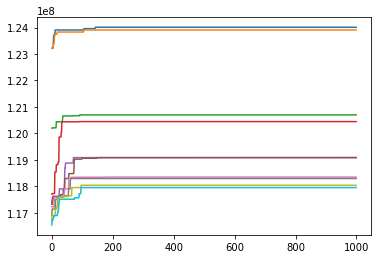

In [43]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(len(y_plot_list)):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

In [44]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 124391.13873362541 seconds ---


In [45]:
import pickle

with open('era-solution/rao_output-2-40', 'wb') as fp:
    pickle.dump(result, fp)
with open('era-solution/rao_xplot-2-40', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('era-solution/rao_yplot-2-40', 'wb') as fp:
    pickle.dump(y_plot_list, fp)
with open('era-solution/rao_aplot-2-40', 'wb') as fp:
    pickle.dump(var_a_plot_list, fp)   
with open('era-solution/rao_bplot-2-40', 'wb') as fp:
    pickle.dump(var_b_plot_list, fp)  

In [46]:
with open('rao_output-2-40', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

FileNotFoundError: [Errno 2] No such file or directory: 'rao_output-2-40'

In [ ]:
with open('rao_yplot-2-40', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

In [ ]:
with open('rao_output-2-40', 'rb') as fp:
    read_result = pickle.load(fp)
    print(countFitness(read_result))
    
# print(read_result)